 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [27]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [28]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_path, parse_dates=True, infer_datetime_format=True)
whale_returns = whale_returns.set_index('Date')
whale_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [29]:
# Count nulls
whale_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [30]:
# Drop nulls
whale_returns = whale_returns.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [31]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_path, parse_dates=True, infer_datetime_format=True)
algo_returns = algo_returns.set_index('Date')
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [32]:
# Count nulls
algo_returns.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [33]:
# Drop nulls
algo_returns = algo_returns.dropna()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [34]:
# Reading S&P 500 Closing Prices
sp500_path = Path("Resources/SP500_history.csv")
sp500_returns = pd.read_csv(sp500_path, parse_dates=True, infer_datetime_format=True)
#sp500_returns = sp500_returns.set_index('Date')
sp500_returns.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [35]:
sp500_returns['Date']=sp500_returns['Date'].astype(str)
sp500_returns['Date']=pd.to_datetime(sp500_returns['Date'], format='%d-%b-%y')

sp500_returns['Date'] = sp500_returns['Date'].dt.strftime('%Y-%m-%d')

sp500_returns.columns = ["Date", "SP_returns"]
sp500_returns

sp500_returns = sp500_returns.set_index('Date')

In [36]:
# Check Data Types
sp500_returns.dtypes

SP_returns    object
dtype: object

In [37]:
# Fix Data Types
sp500_returns = sp500_returns['SP_returns'].str.replace('$','',regex=True)

#sp500_returns.head()

sp500_returns = sp500_returns.astype('float64')

In [38]:
# Calculate Daily Returns
sp500_daily = sp500_returns.pct_change()

#sp500_daily.head()

In [39]:
# Drop nulls
sp500_daily = sp500_daily.dropna()
sp500_daily.head()

Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
Name: SP_returns, dtype: float64

In [40]:
# Rename `Close` Column to be specific to this portfolio.
#sp500_daily.columns = ["SP_returns"]
#sp500_daily.head()

## Combine Whale, Algorithmic, and S&P 500 Returns

In [41]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns, algo_returns, sp500_daily], axis=1, join='inner')
combined_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily returns of select portfolios'}, xlabel='Date'>

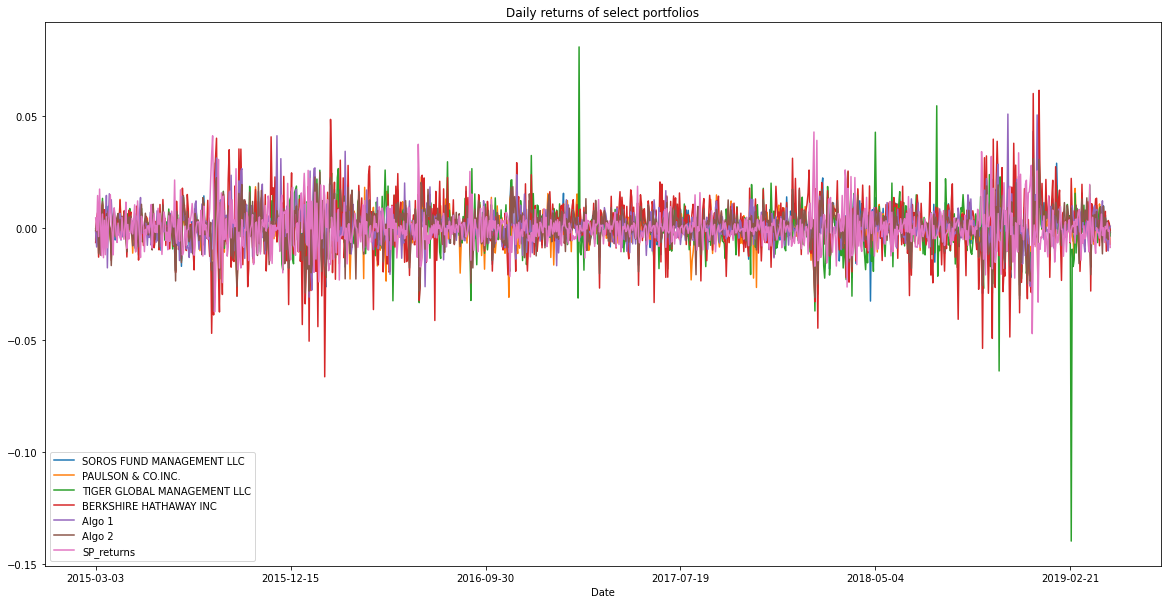

In [42]:
# Plot daily returns of all portfolios
combined_df.plot(figsize = (20, 10), title='Daily returns of select portfolios')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative returns'}, xlabel='Date'>

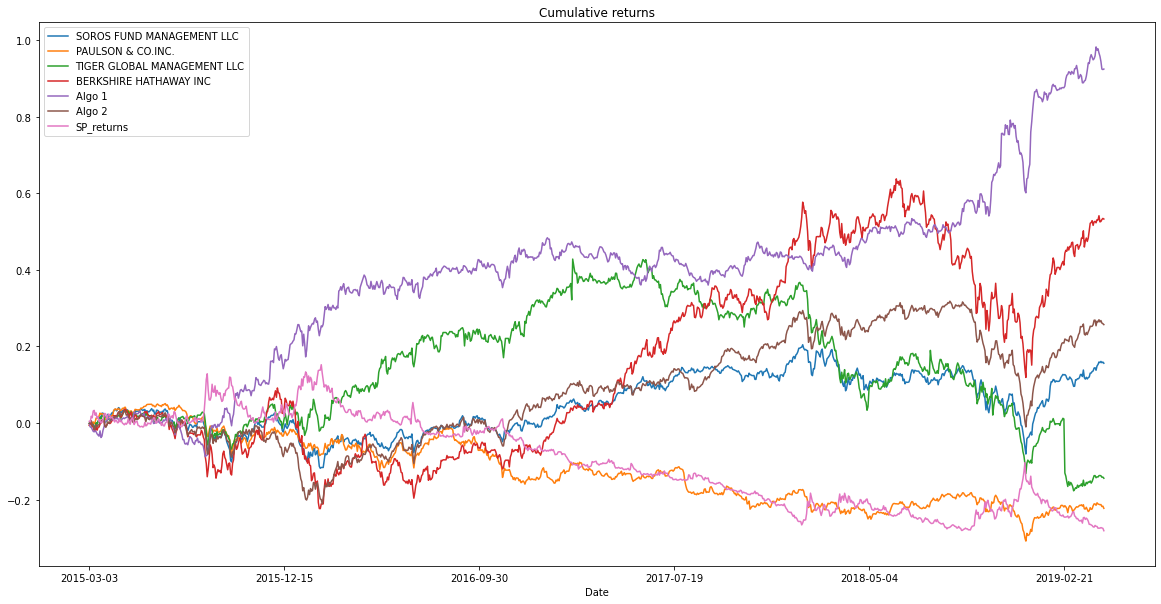

In [43]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize = (20,10), title = 'Cumulative returns')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

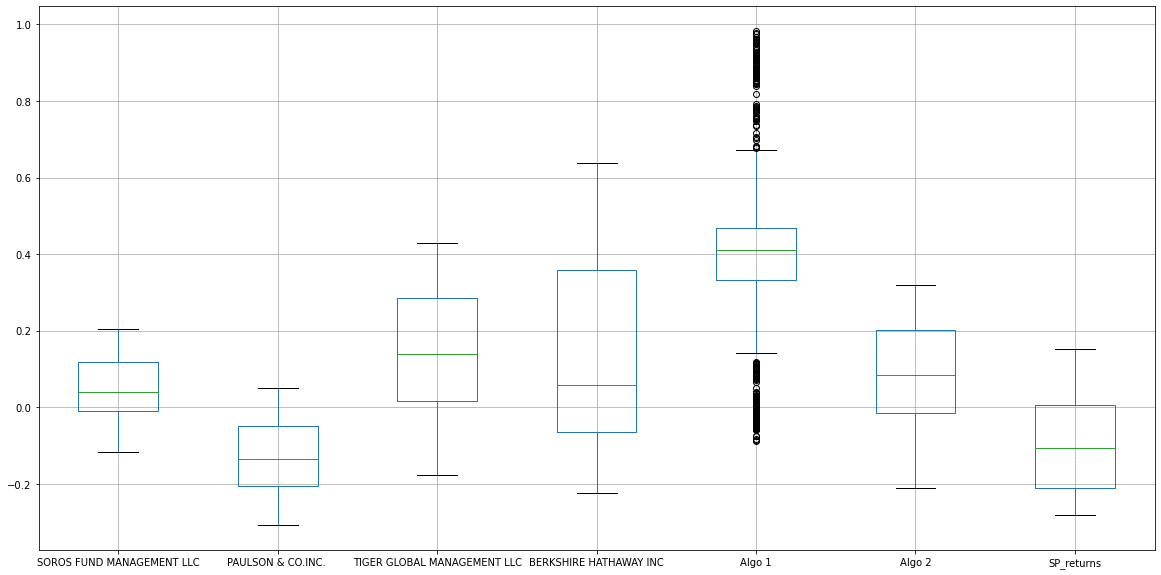

In [45]:
# Box plot to visually show risk
cumulative_returns.boxplot(figsize = (20,10))

### Calculate Standard Deviations

In [46]:
# Calculate the daily standard deviations of all portfolios
std_daily = cumulative_returns.std()
std_daily

SOROS FUND MANAGEMENT LLC      0.073187
PAULSON & CO.INC.              0.088447
TIGER GLOBAL MANAGEMENT LLC    0.149652
BERKSHIRE HATHAWAY INC         0.241382
Algo 1                         0.231772
Algo 2                         0.131642
SP_returns                     0.114846
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [47]:
# Calculate  the daily standard deviation of S&P 500
sp_std_daily = cumulative_returns["SP_returns"].std()
sp_std_daily

0.11484604096700507

In [48]:
# Determine which portfolios are riskier than the S&P 500
print("BERKSHIRE HATHAWAY INC and Algo 1 are both more risky than SP_returns")

BERKSHIRE HATHAWAY INC and Algo 1 are both more risky than SP_returns


### Calculate the Annualized Standard Deviation

In [49]:
# Calculate the annualized standard deviation (252 trading days)
std_annual = cumulative_returns.std()*np.sqrt(252)
std_annual

SOROS FUND MANAGEMENT LLC      1.161806
PAULSON & CO.INC.              1.404053
TIGER GLOBAL MANAGEMENT LLC    2.375658
BERKSHIRE HATHAWAY INC         3.831820
Algo 1                         3.679263
Algo 2                         2.089756
SP_returns                     1.823124
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'rolling standard deviation'}, xlabel='Date'>

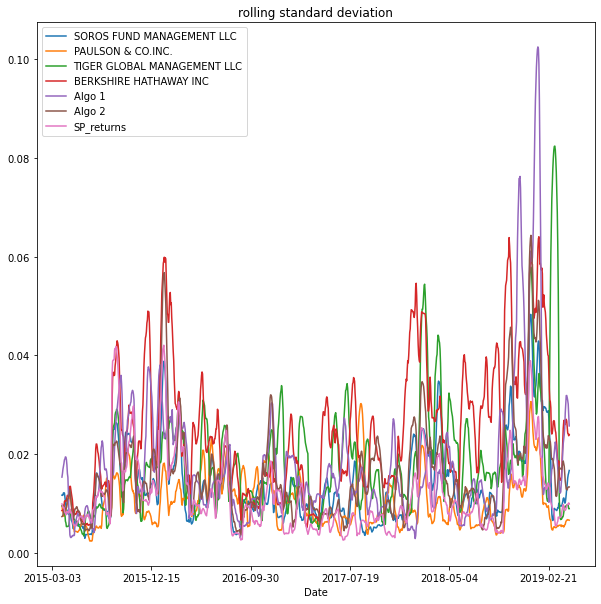

In [50]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21_day = cumulative_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_21_day.plot(figsize = (10,10), title='rolling standard deviation')

### Calculate and plot the correlation

In [51]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP_returns,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of Algo 1'}, xlabel='Date'>

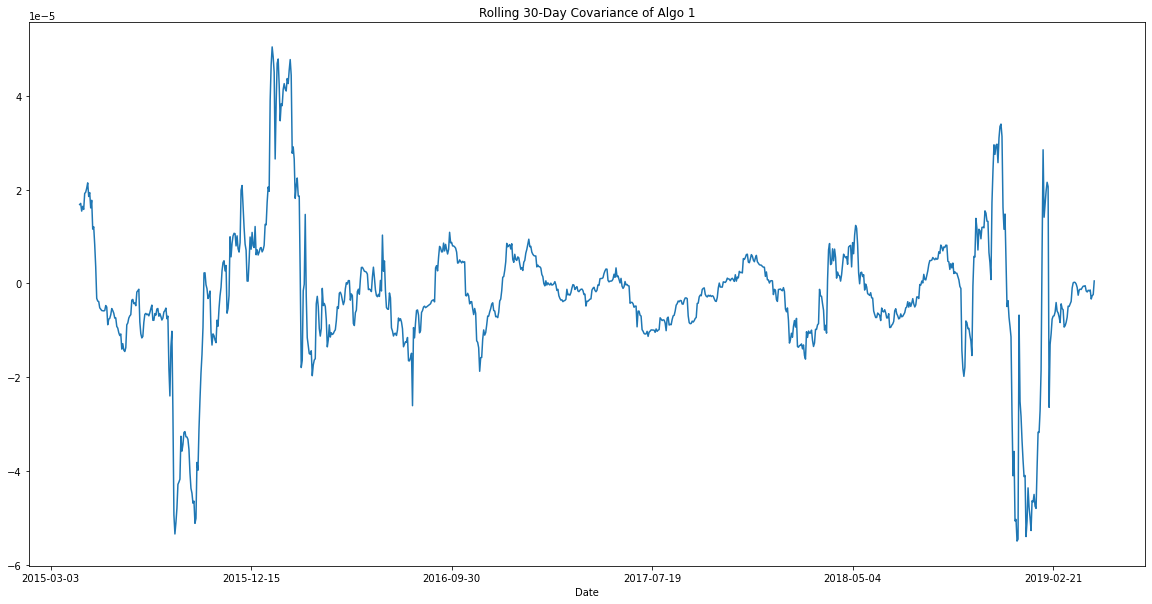

In [52]:
# Calculate covariance of a single portfolio
covariance = combined_df ['Algo 1'].cov(combined_df ['SP_returns'])
covariance

rolling_covariance = combined_df['Algo 1'].rolling(window=30).cov(combined_df['SP_returns'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of Algo 1')

<AxesSubplot:title={'center':'Rolling 30-Day Variance of SP returns'}, xlabel='Date'>

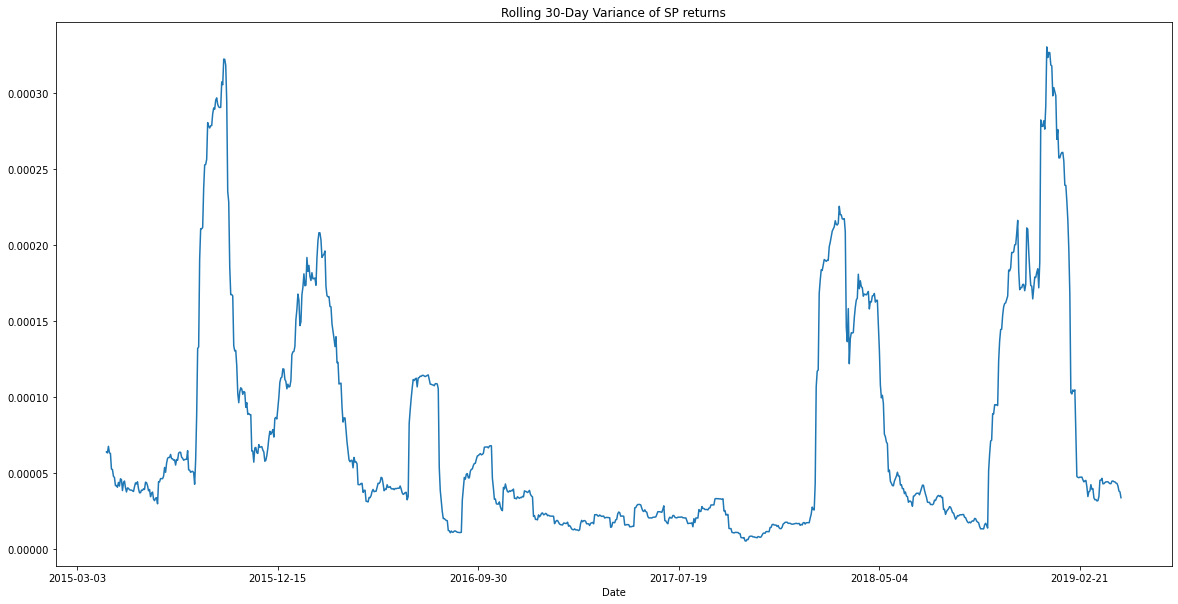

In [53]:
# Calculate variance of S&P 500
sp500_variance = combined_df['SP_returns'].var()
sp500_variance

rolling_variance = combined_df['SP_returns'].rolling(window=30).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of SP returns')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Algo 1'}, xlabel='Date'>

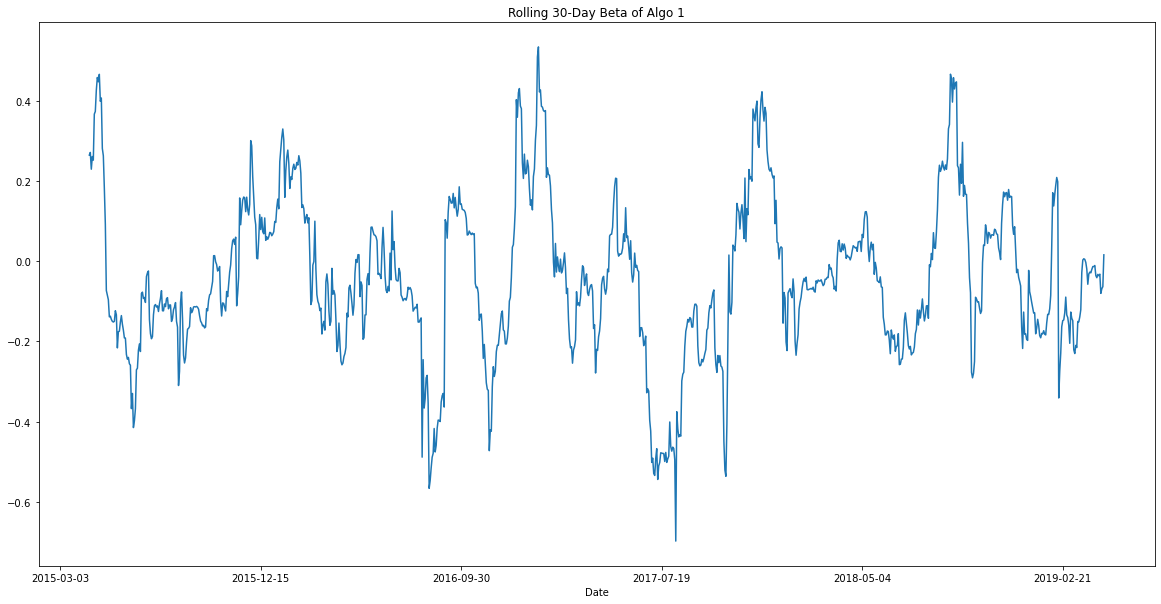

In [54]:
# Computing beta
# Plot beta trend
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Algo 1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [55]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,0.001560
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,0.005975
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,0.003375
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,0.006337
...,...,...,...,...,...,...,...
2019-04-15,0.001439,0.000450,-0.000813,0.001896,0.001175,0.001313,-0.001290
2019-04-16,0.001480,0.000448,-0.000813,0.001862,0.000912,0.001364,-0.001174
2019-04-17,0.001338,0.000223,-0.000930,0.001906,0.000548,0.001150,-0.001187


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [56]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP_returns                    -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe ratio'}>

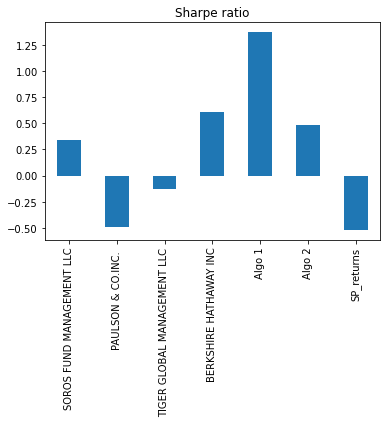

In [58]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe ratio')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [64]:
# Reading data from 1st stock
aapl_path = Path("Resources/aapl_google_finance.csv")
aapl_close = pd.read_csv(aapl_path, parse_dates=True, infer_datetime_format=True)
#aapl_close = aapl_close.set_index('Date')

aapl_close['Date']=aapl_close['Date'].astype(str)

aapl_close['Date']=pd.to_datetime(aapl_close['Date'], format='%m/%d/%Y %H:%M:%S')

aapl_close['Date'] = aapl_close['Date'].dt.strftime('%Y-%m-%d')

aapl_close.columns = ["Date", "aapl_close"]
aapl_close = aapl_close.set_index('Date')

aapl_close


,aapl_close
Date,
2018-01-02,43.07
2018-01-03,43.06
2018-01-04,43.26
2018-01-05,43.75
2018-01-08,43.59
...,...
2019-04-12,49.72
2019-04-15,49.81
2019-04-16,49.81


In [65]:
# Reading data from 2nd stock
fb_path = Path("Resources/fb_google_finance.csv")
fb_close = pd.read_csv(fb_path, parse_dates=True, infer_datetime_format=True)
#fb_close = fb_close.set_index('Date')
fb_close['Date']=fb_close['Date'].astype(str)

fb_close['Date']=pd.to_datetime(fb_close['Date'], format='%m/%d/%Y %H:%M:%S')

fb_close['Date'] = fb_close['Date'].dt.strftime('%Y-%m-%d')

fb_close.columns = ["Date", "fb_close"]
fb_close = fb_close.set_index('Date')
fb_close

,fb_close
Date,
2018-01-02,181.42
2018-01-03,184.67
2018-01-04,184.33
2018-01-05,186.85
2018-01-08,188.28
...,...
2019-04-12,179.10
2019-04-15,179.65
2019-04-16,178.87


In [66]:
# Reading data from 3rd stock
tsla_path = Path("Resources/tsla_google_finance.csv")
tsla_close = pd.read_csv(tsla_path, parse_dates=True, infer_datetime_format=True)
#tsla_close = tsla_close.set_index('Date')

In [67]:
tsla_close['Date']=tsla_close['Date'].astype(str)
tsla_close['Date']=pd.to_datetime(tsla_close['Date'], format='%m/%d/%Y %H:%M:%S')
tsla_close['Date'] = tsla_close['Date'].dt.strftime('%Y-%m-%d')

tsla_close.columns = ["Date", "tsla_close"]
tsla_close = tsla_close.set_index('Date')
tsla_close

,tsla_close
Date,
2018-01-02,64.11
2018-01-03,63.45
2018-01-04,62.92
2018-01-05,63.32
2018-01-08,67.28
...,...
2019-04-12,53.54
2019-04-15,53.28
2019-04-16,54.67


In [68]:
# Combine all stocks in a single DataFrame
combined_close = pd.concat([aapl_close, fb_close, tsla_close], axis=1, join='inner')
combined_close

,aapl_close,fb_close,tsla_close
Date,,,
2018-01-02,43.07,181.42,64.11
2018-01-03,43.06,184.67,63.45
2018-01-04,43.26,184.33,62.92
2018-01-05,43.75,186.85,63.32
2018-01-08,43.59,188.28,67.28
...,...,...,...
2019-04-12,49.72,179.10,53.54
2019-04-15,49.81,179.65,53.28
2019-04-16,49.81,178.87,54.67


In [69]:
# Reset Date index


In [70]:
# Reorganize portfolio data by having a column per symbol


In [71]:
# Calculate daily returns
combined_returns = combined_close.pct_change()

# Drop NAs
combined_returns.dropna()

# Display sample data
combined_returns

,aapl_close,fb_close,tsla_close
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.000232,0.017914,-0.010295
2018-01-04,0.004645,-0.001841,-0.008353
2018-01-05,0.011327,0.013671,0.006357
2018-01-08,-0.003657,0.007653,0.062539
...,...,...,...
2019-04-12,-0.000402,0.008957,-0.002608
2019-04-15,0.001810,0.003071,-0.004856
2019-04-16,0.000000,-0.004342,0.026089


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [72]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = combined_returns.dot(weights)
portfolio_returns_df = pd.DataFrame(portfolio_returns)


portfolio_returns_df.columns = ["portfolio_returns"]
#portfolio_returns_df = portfolio_returns_df.rename({0: 'portfolio_returns'})

# Display sample data
portfolio_returns_df

,portfolio_returns
Date,
2018-01-02,NaN
2018-01-03,0.002462
2018-01-04,-0.001850
2018-01-05,0.010452
2018-01-08,0.022179
...,...
2019-04-12,0.001982
2019-04-15,0.000008
2019-04-16,0.007249


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [73]:
# Join your returns DataFrame to the original returns DataFrame
add_returns = pd.concat([portfolio_returns_df, combined_df], axis=1, join='inner')
#add_returns

In [74]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
add_returns = add_returns.dropna()
add_returns

,portfolio_returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_returns
Date,,,,,,,,
2018-01-03,0.002462,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,-0.004012
2018-01-04,-0.001850,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,-0.006985
2018-01-05,0.010452,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.001660
2018-01-08,0.022179,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001301
2018-01-09,-0.003478,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001113
...,...,...,...,...,...,...,...,...
2019-04-12,0.001982,0.005663,-0.001165,0.004217,0.007316,-0.005501,0.004504,0.000630
2019-04-15,0.000008,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.007249,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [75]:
# Calculate the annualized `std`
final_std_annual = add_returns.std()*np.sqrt(252)
final_std_annual

portfolio_returns              0.304261
SOROS FUND MANAGEMENT LLC      0.150901
PAULSON & CO.INC.              0.117351
TIGER GLOBAL MANAGEMENT LLC    0.223176
BERKSHIRE HATHAWAY INC         0.234208
Algo 1                         0.122074
Algo 2                         0.140442
SP_returns                     0.162495
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

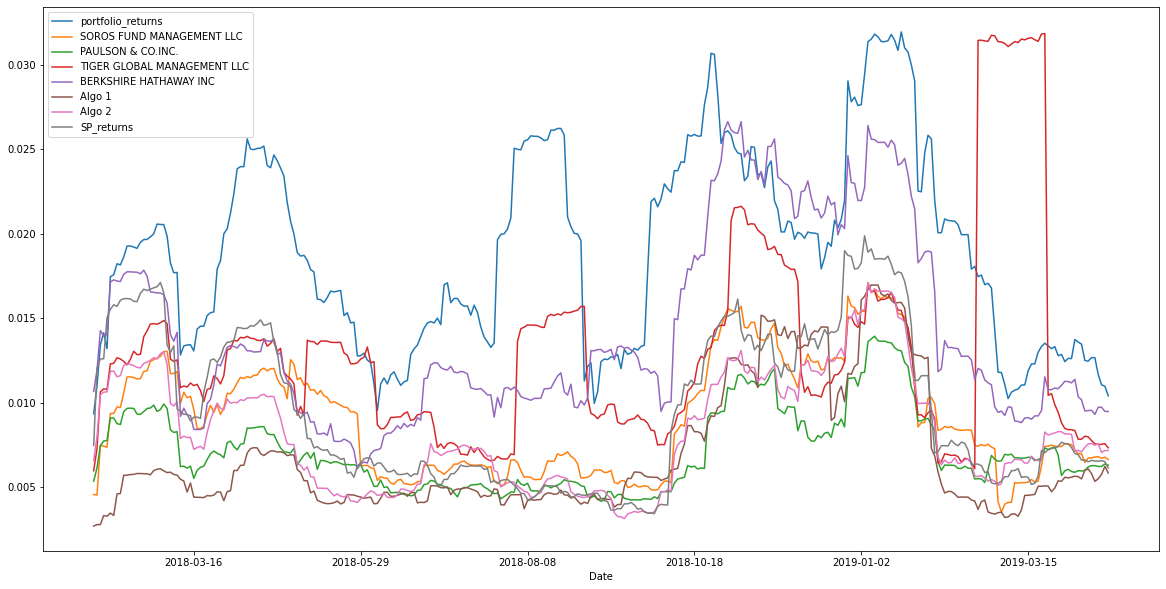

In [76]:
# Calculate rolling standard deviation
final_rolling_21_day = add_returns.rolling(window=21).std()
# Plot rolling standard deviation
final_rolling_21_day.plot(figsize = (20,10))

### Calculate and plot the correlation

In [77]:
# Calculate and plot the correlation
correlation = add_returns.corr()
# Display de correlation matrix
correlation

,portfolio_returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_returns
portfolio_returns,1.000000,0.608491,0.523107,0.357061,0.707487,0.211747,0.606989,0.057812
SOROS FUND MANAGEMENT LLC,0.608491,1.000000,0.776736,0.528169,0.794238,0.329821,0.840476,0.003892
PAULSON & CO.INC.,0.523107,0.776736,1.000000,0.537858,0.664813,0.341842,0.805742,-0.018385
TIGER GLOBAL MANAGEMENT LLC,0.357061,0.528169,0.537858,1.000000,0.389723,0.143579,0.488767,-0.022981
BERKSHIRE HATHAWAY INC,0.707487,0.794238,0.664813,0.389723,1.000000,0.315928,0.793247,-0.034076
Algo 1,0.211747,0.329821,0.341842,0.143579,0.315928,1.000000,0.340363,-0.050084
Algo 2,0.606989,0.840476,0.805742,0.488767,0.793247,0.340363,1.000000,-0.024562
SP_returns,0.057812,0.003892,-0.018385,-0.022981,-0.034076,-0.050084,-0.024562,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 30-Day Beta of portfolio returns'}, xlabel='Date'>

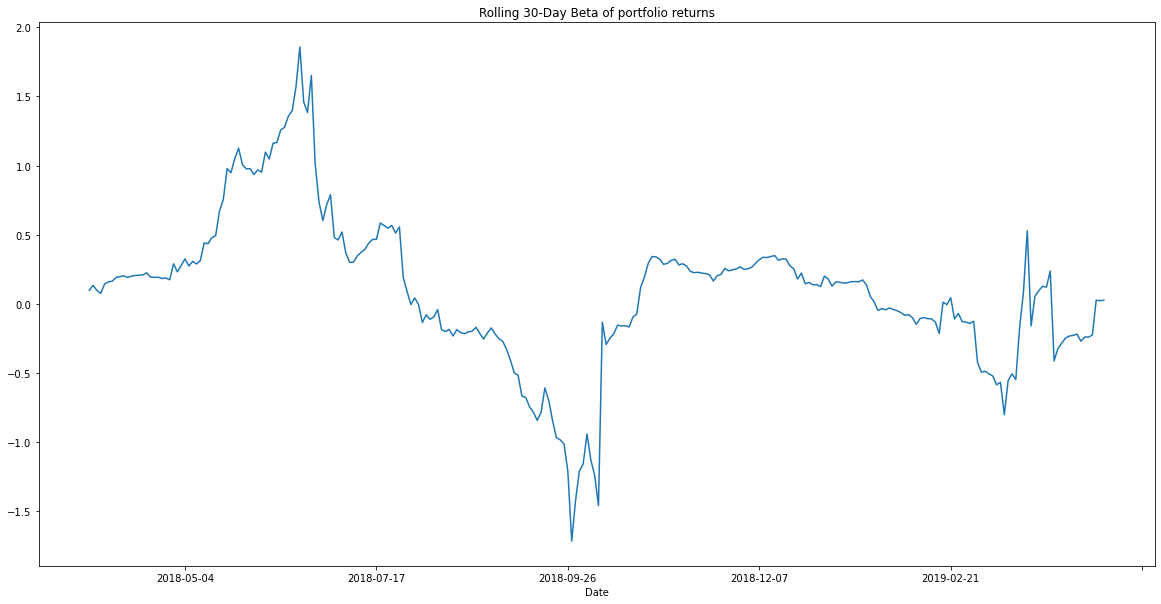

In [78]:
# Calculate and plot Beta
final_rolling_covariance = add_returns['portfolio_returns'].rolling(window=60).cov(combined_df['SP_returns'])
#final_rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of Algo 1')

rolling_variance = combined_df['SP_returns'].rolling(window=30).var()
#rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of SP returns')

final_rolling_beta = final_rolling_covariance / rolling_variance
final_rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of portfolio returns')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [79]:
# Calculate Annualized Sharpe Ratios
final_sharpe_ratios = (add_returns.mean() * 252) / (add_returns.std() * np.sqrt(252))
final_sharpe_ratios

portfolio_returns              0.287899
SOROS FUND MANAGEMENT LLC      0.120535
PAULSON & CO.INC.             -0.184904
TIGER GLOBAL MANAGEMENT LLC   -1.342193
BERKSHIRE HATHAWAY INC         0.400910
Algo 1                         1.903596
Algo 2                         0.199521
SP_returns                    -0.250297
dtype: float64

<AxesSubplot:>

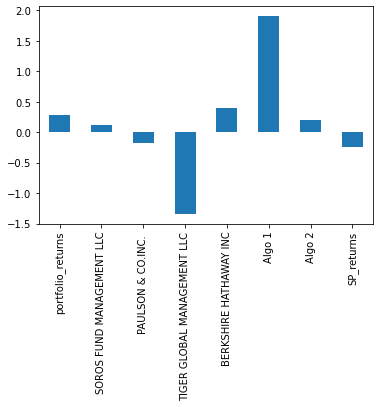

In [80]:
# Visualize the sharpe ratios as a bar plot
final_sharpe_ratios.plot.bar()

### How does your portfolio do?

Write your answer here!

In [483]:
print("In this new time frame, 'portfolio_returns' sharpe ratio is positive, but falls short of Berkshire Hathaway and Whale Algo 1.")

In this new time frame, 'portfolio_returns' sharpe ratio is positive, but falls short of Berkshire Hathaway and Whale Algo 1.
